<a href="https://colab.research.google.com/github/2303A52243/STML-ASSIGMENT-5/blob/main/STML_ASSIGNMENT_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
url = '/content/Salary_Data.csv'
data = pd.read_csv(url)

print(data.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [8]:
X = data[['YearsExperience']]
y = data['Salary']


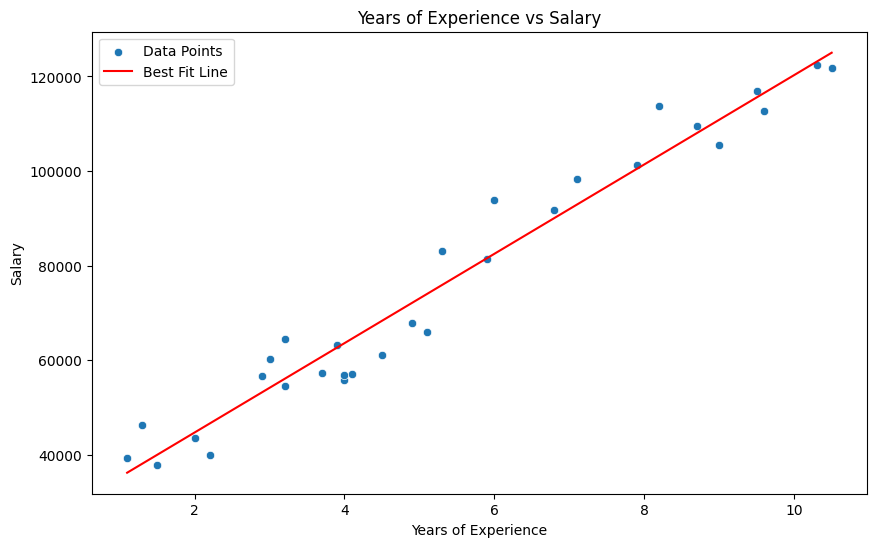

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.squeeze(), y=y, label='Data Points')

# Plotting the best fit line
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to compute MSE and MAE for a given test size
def evaluate_model(test_size):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the target
    y_pred = model.predict(X_test)

    # Calculate MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return mse, mae

# Evaluate for test sizes of 20% and 25%
mse_20, mae_20 = evaluate_model(0.20)
mse_25, mae_25 = evaluate_model(0.25)

print(f'Test Size 20% -> MSE: {mse_20:.2f}, MAE: {mae_20:.2f}')
print(f'Test Size 25% -> MSE: {mse_25:.2f}, MAE: {mae_25:.2f}')


Test Size 20% -> MSE: 12823412.30, MAE: 2446.17
Test Size 25% -> MSE: 22407940.14, MAE: 3508.55


In [18]:
#Question2
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
data = {
    'Feature1': [1.2, 2.4, 3.5, 4.1, 1.9, 3.7, 2.1, 3.3, 2.8, 4.0, 2.4, 3.5, 1.8, 3.6, 3.3, 2.7],
    'Feature2': [2.3, 1.9, 2.7, 3.0, 2.8, 2.5, 3.2, 2.4, 3.1, 3.3, 2.2, 1.9, 3.1, 3.5, 2.5, 4.9],
    'Feature3': [3.1, 2.8, 1.5, 3.6, 2.5, 4.0, 2.2, 3.0, 1.8, 2.7, 4.1, 4.8, 1.9, 4.1, 3.0, 3.7],
    'Feature4': [4.2, 3.5, 2.9, 4.8, 3.2, 3.6, 4.1, 4.5, 3.6, 3.3, 4.1, 4.9, 3.6, 4.4, 4.5, 4.0],
    'Target': [15.6, 13.1, 12.4, 18.2, 14.1, 16.0, 14.5, 17.3, 14.9, 19.2, 13.2, 15.4, 12.0, 16.0, 18.0, 19.5]
}

df = pd.DataFrame(data)
print(df.head())


   Feature1  Feature2  Feature3  Feature4  Target
0       1.2       2.3       3.1       4.2    15.6
1       2.4       1.9       2.8       3.5    13.1
2       3.5       2.7       1.5       2.9    12.4
3       4.1       3.0       3.6       4.8    18.2
4       1.9       2.8       2.5       3.2    14.1


In [11]:
# Define features and target
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4']]
y = df['Target']


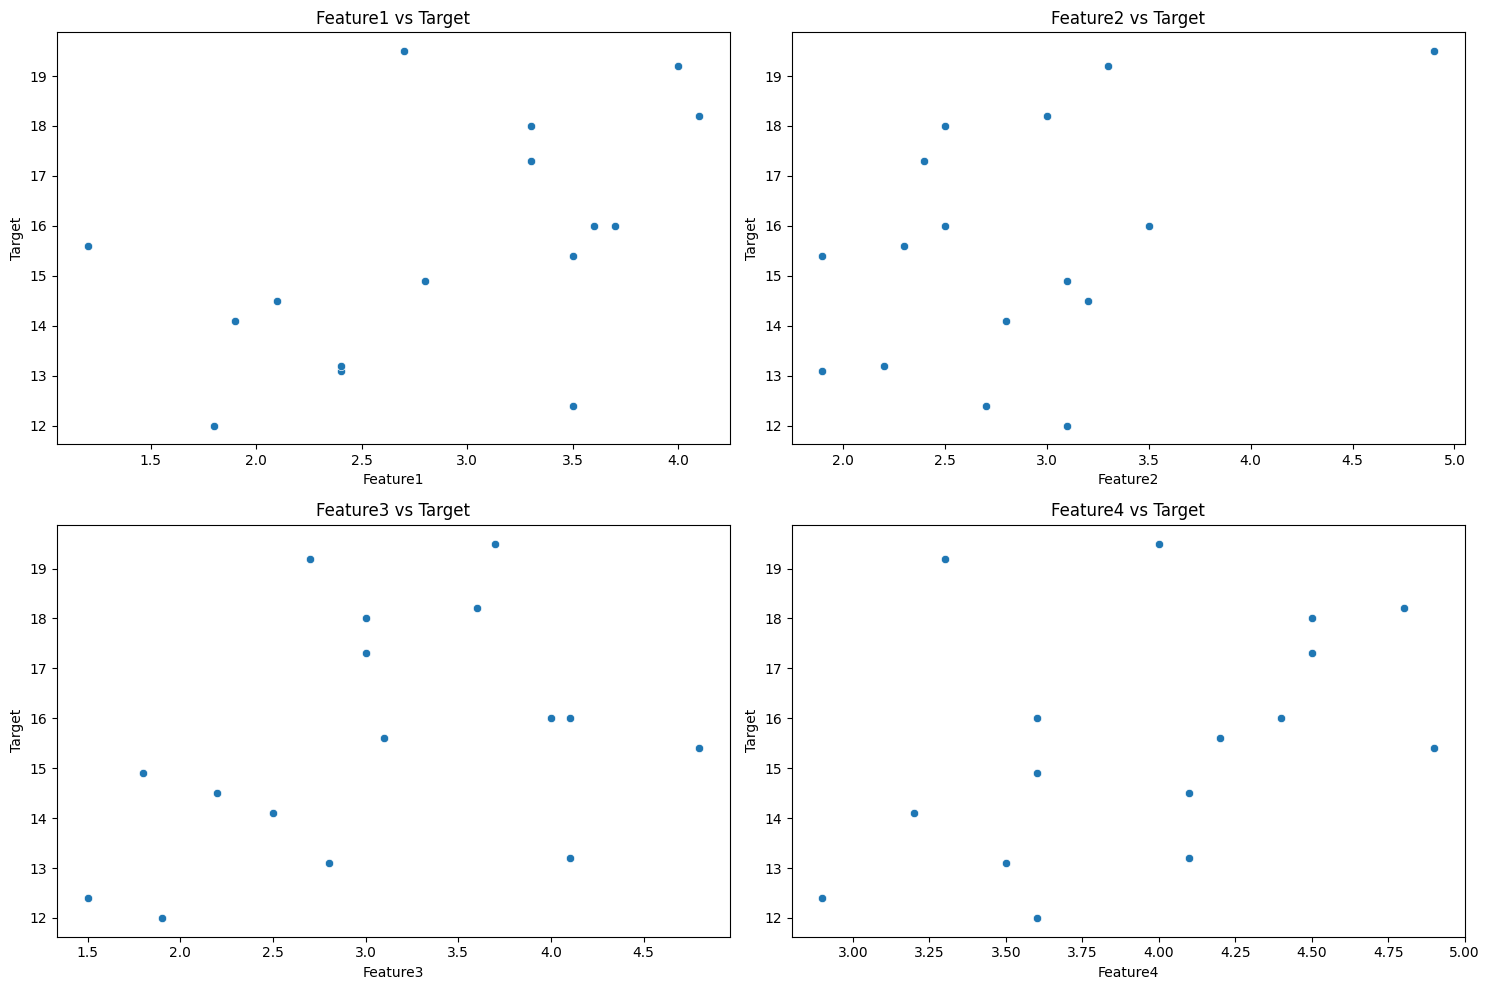

In [17]:
import seaborn as sns
features = ['Feature1', 'Feature2', 'Feature3', 'Feature4']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['Target'])
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()


In [16]:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)


In [15]:
def evaluate_model(test_size):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return mse, mae

mse_20, mae_20 = evaluate_model(0.20)
mse_30, mae_30 = evaluate_model(0.30)

print(f'Test Size 20% -> MSE: {mse_20:.2f}, MAE: {mae_20:.2f}')
print(f'Test Size 30% -> MSE: {mse_30:.2f}, MAE: {mae_30:.2f}')


Test Size 20% -> MSE: 4.68, MAE: 1.48
Test Size 30% -> MSE: 4.38, MAE: 1.63
